In [ ]:
!pip install scikit-surprise
import pandas as pd
import numpy as np

from surprise import Dataset, BaselineOnly, Reader
from surprise import SVD, KNNBasic, KNNWithMeans
from surprise.model_selection import cross_validate

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from IPython.display import Image
init_notebook_mode(connected=True)
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.0 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633945 sha256=d63dceca188c9c3556dcc1e79bb0e564ab69a8dee8fa8b9a83160679cfe21848
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
FILE_PATH = "./ratings_small.csv"

reader = Reader(line_format="user item rating timestamp", sep=',', skip_lines=1)

data = Dataset.load_from_file(FILE_PATH, reader=reader)

In [ ]:
def runAlgorithmsCrossValidate(algorithms, cv=5):
	means = {}
	for name in algorithms:
		output = cross_validate(algorithms[name], data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
		result = pd.DataFrame.from_dict(output)
		means[name] = result.mean()
	benchmarks = pd.DataFrame.from_dict(means, orient='index')
	benchmarks.drop(columns=['fit_time', 'test_time'], inplace=True)
	return benchmarks

In [ ]:
algorithms3 = {
	'PMF': SVD(biased=False),
	'UserBased': KNNBasic(sim_options={'user_based': True}),
	'ItemBased': KNNBasic(sim_options={'user_based': False})
}

benchmarks3 = runAlgorithmsCrossValidate(algorithms3)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
benchmarks3.style.background_gradient(axis=0, cmap ='BuPu').set_properties(**{'font-size': '24px'})

,test_rmse,test_mae
PMF,1.008281,0.778094
UserBased,0.969224,0.744662
ItemBased,0.934837,0.720859


In [ ]:
similarities = ['cosine', 'pearson', 'msd']

algorithmsSimilaritiesUserBased = {}
for sim in similarities:
	algorithmsSimilaritiesUserBased['UserBased-' + sim.upper()] = KNNBasic(sim_options={'name': sim, 'user_based': True})

algorithmsSimilaritiesItemBased = {}
for sim in similarities:
	algorithmsSimilaritiesItemBased['ItemBased-' + sim.upper()] = KNNBasic(sim_options={'name': sim, 'user_based': False})

benchmarksSimilaritiesUserBased = runAlgorithmsCrossValidate(algorithmsSimilaritiesUserBased)
benchmarksSimilaritiesItemBased = runAlgorithmsCrossValidate(algorithmsSimilaritiesItemBased)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the ms

In [ ]:
benchmarksSimilaritiesUserBased.sort_values('test_rmse').style.background_gradient(axis=0, cmap ='YlOrRd').set_properties(**{'font-size': '24px'})

,test_rmse,test_mae
UserBased-MSD,0.967529,0.743435
UserBased-COSINE,0.993498,0.767673
UserBased-PEARSON,0.998665,0.773439


In [ ]:
benchmarksSimilaritiesItemBased.sort_values('test_rmse').style.background_gradient(axis=0, cmap ='YlOrRd').set_properties(**{'font-size': '24px'})


,test_rmse,test_mae
ItemBased-MSD,0.934804,0.721109
ItemBased-PEARSON,0.989737,0.768362
ItemBased-COSINE,0.995058,0.774984


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fce925c7510>,
      dtype=object)

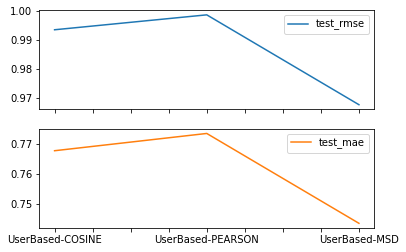

In [ ]:
benchmarksSimilaritiesUserBased.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fce926f1b50>,
      dtype=object)

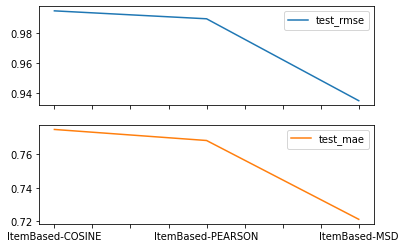

In [ ]:
benchmarksSimilaritiesItemBased.plot(subplots=True)

In [ ]:
knn_range = range(1,30)

algorithms = {}
for i in knn_range:
	algorithms['KNN-User-' + str(i)] = KNNBasic(k=i, sim_options={'user_based': True})
benchmarksUserBased = runAlgorithmsCrossValidate(algorithms)

algorithms = {}
for i in knn_range:
	algorithms['KNN-Item-' + str(i)] = KNNBasic(k=i, sim_options={'user_based': False})
benchmarksItemBased = runAlgorithmsCrossValidate(algorithms, cv=3)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

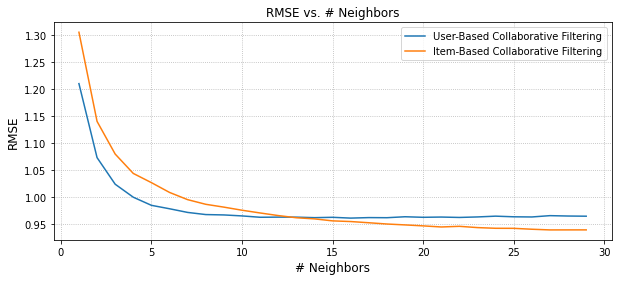

In [ ]:
X_LABEL = '# Neighbors'
Y_LABEL = 'RMSE'
TARGET_VAR = 'test_rmse'

plt.figure(figsize=(10,4))
plt.plot(knn_range, benchmarksUserBased[TARGET_VAR], label = "User-Based Collaborative Filtering")
plt.plot(knn_range, benchmarksItemBased[TARGET_VAR], label = "Item-Based Collaborative Filtering")
plt.xlabel(X_LABEL, fontsize=12)
plt.ylabel(Y_LABEL, fontsize=12)
plt.title(Y_LABEL + ' vs. ' + X_LABEL)
plt.legend(loc='best')
plt.grid(ls='dotted')

plt.show()

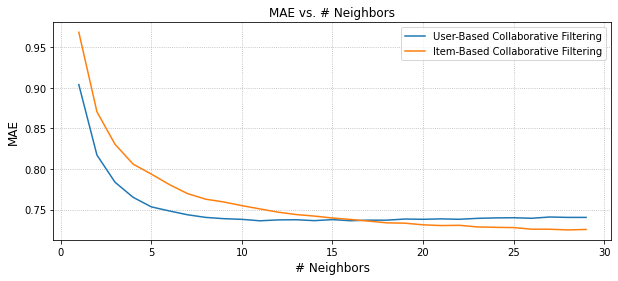

In [ ]:
X_LABEL = '# Neighbors'
Y_LABEL = 'MAE'
TARGET_VAR = 'test_mae'

plt.figure(figsize=(10,4))
plt.plot(knn_range, benchmarksUserBased[TARGET_VAR], label = "User-Based Collaborative Filtering")
plt.plot(knn_range, benchmarksItemBased[TARGET_VAR], label = "Item-Based Collaborative Filtering")
plt.xlabel(X_LABEL, fontsize=12)
plt.ylabel(Y_LABEL, fontsize=12)
plt.title(Y_LABEL + ' vs. ' + X_LABEL)
plt.legend(loc='best')
plt.grid(ls='dotted')

plt.show()

In [ ]:
best = {
	'User-RMSE': (benchmarksUserBased['test_rmse'].idxmin(), benchmarksUserBased['test_rmse'].min()),
	'User-MAE': (benchmarksUserBased['test_mae'].idxmin(), benchmarksUserBased['test_mae'].min()),
	'Item-RMSE': (benchmarksItemBased['test_rmse'].idxmin(), benchmarksItemBased['test_rmse'].min()),
	'Item-MAE': (benchmarksItemBased['test_mae'].idxmin(), benchmarksItemBased['test_mae'].min())
}

pd.DataFrame.from_dict(best, orient='index', columns=['Best K', 'Error Measure'])

,Best K,Error Measure
User-RMSE,KNN-User-16,0.961263
User-MAE,KNN-User-11,0.736270
Item-RMSE,KNN-Item-27,0.939384
Item-MAE,KNN-Item-28,0.725055


In [ ]:
best = {
    'User-RMSE': (benchmarksUserBased['test_rmse'].idxmin(), benchmarksUserBased['test_rmse'].min()),
    'Item-RMSE': (benchmarksItemBased['test_rmse'].idxmin(), benchmarksItemBased['test_rmse'].min()),
}

In [ ]:
pd.DataFrame.from_dict(best, orient='index', columns=['Best K', 'RMSE'])


,Best K,RMSE
User-RMSE,KNN-User-16,0.961263
Item-RMSE,KNN-Item-27,0.939384
